In [1]:
%load_ext autoreload
%autoreload 2
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)
from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime
from amftrack.pipeline.functions.image_processing.experiment_util import (
    plot_full_image_with_features,
)
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    load_graphs,
)
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_width,
    reconstruct_image_from_general,
    plot_full,
)

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
plates = [
    "078_20220920",
    "079_20220920",
    "080_20220920",
    "081_20220920",
    "082_20220920",
    "083_20220920",
    "084_20220920",
    "001_20220920",
    "024_20220920",
    "073_20220920",
    "002_20220920",
    "003_20220920",
    "004_20220920",
    "005_20220920",
    "006_20220920",
    "007_20220920",
    "008_20220920",
    "009_20220920",
    "010_20220920",
    "011_20220920",
    "012_20220920",
    "019_20220920",
    "020_20220920",
    "021_20220920",
    "022_20220920",
    "023_20220920",
    "037_20220920",
    "038_20220920",
    "039_20220920",
    "040_20220920",
    "042_20220920",
    "043_20220920",
    "044_20220920",
    "045_20220920",
    "046_20220920",
    "016_20220921",
    "017_20220921",
    "034_20220921",
    "051_20220920",
    "094_20220921",
    "064_20220921",
    "026_20220921",
    "027_20220921",
    "028_20220921",
    "029_20220921",
    "031_20220921",
    "033_20220921",
    "035_20220921",
    "036_20220921",
    "047_20220920",
    "041_20220920",
    "015_20220921",
    "068_20220921",
    "107_20220921",
    "095_20220921",
    "062_20220921",
    "096_20220921",
    "104_20220921",
    "050_20220920",
    "030_20220921",
    "025_20220921",
    "100_20220921",
    "067_20220921",
    "048_20220920",
    "055_20220921",
    "056_20220921",
    "057_20220921",
    "058_20220921",
    "059_20220921",
    "060_20220921",
    "061_20220921",
    "063_20220921",
    "014_20220921",
    "018_20220921",
    "099_20220921",
    "069_20220921",
    "054_20220920",
    "075_20220920",
    "092_20220921",
    "093_20220921",
    "097_20220921",
    "098_20220921",
    "105_20220921",
    "106_20220921",
    "108_20220921",
    "085_20220921",
    "086_20220921",
    "087_20220921",
    "088_20220921",
    "089_20220921",
    "090_20220921",
    "091_20220921",
    "049_20220920",
    "052_20220920",
    "053_20220920",
    "074_20220920",
    "076_20220920",
    "077_20220920",
    "013_20220921",
    "070_20220921",
    "071_20220921",
    "072_20220921",
    "102_20220921",
    "032_20220921",
    "101_20220921",
    "065_20220921",
    "066_20220921",
    "103_20220921",
]
plates = [
    "_".join((str(int(plate.split("_")[0])), str(int(plate.split("_")[1]))))
    for plate in plates
]
directory_targ = directory_project

In [3]:
update_plate_info(directory_targ, local=True)
all_folders = get_current_folders(directory_targ, local=True)

analysed:   0%|          | 0/578 [00:00<?, ?it/s]

In [4]:
plates = ["19_20220920"]

In [5]:
folders = all_folders.loc[all_folders["unique_id"].isin(plates)]

In [6]:
folders

total_path Plate   strain     medium  \
120  /projects/0/einf914/data/20220923_1447_Plate01   019  'A5-C2'  'control'   
141  /projects/0/einf914/data/20220921_1716_Plate01   019  'A5-C2'  'control'   
282  /projects/0/einf914/data/20220930_1925_Plate01   019  'A5-C2'  'control'   
336  /projects/0/einf914/data/20220920_1438_Plate01   019  'A5-C2'  'control'   
427  /projects/0/einf914/data/20220926_1126_Plate01   019  'A5-C2'  'control'   
542  /projects/0/einf914/data/20221003_1829_Plate01   019  'A5-C2'  'control'   

    CrossDate /Img/TileConfiguration.txt.registered  \
120  20220920                                  True   
141  20220920                                  True   
282  20220920                                  True   
336  20220920                                  True   
427  20220920                                  True   
542  20220920                                  True   

    /Analysis/skeleton_compressed.mat  \
120                              True   
141                             False   
282                              True   
336                              True   
427                              True   
542                              True   

    /Analysis/skeleton_masked_compressed.mat  \
120                                     True   
141                                    False   
282                                     True   
336                                     True   
427                                     True   
542                                     True   

    /Analysis/skeleton_pruned_compressed.mat /Analysis/transform.mat  \
120                                     True                    True   
141                                    False                   False   
282                                     True                    True   
336                                     True                   False   
427                                     True                   False   
542                                     True                    True   

    /Analysis/transform_corrupt.mat  \
120                           False   
141                           False   
282                           False   
336                           False   
427                            True   
542                           False   

    /Analysis/skeleton_realigned_compressed.mat /Analysis/nx_graph_pruned.p  \
120                                        True                        True   
141                                       False                       False   
282                                        True                        True   
336                                        True                        True   
427                                        True                        True   
542                                        True                        True   

    /Analysis/nx_graph_pruned_width.p /Analysis/nx_graph_pruned_labeled.p  \
120                              True                                True   
141                             False                               False   
282                              True                                True   
336                             False                               False   
427                              True                                True   
542                              True                                True   

                   date                 folder    unique_id  \
120  23.09.2022, 14:47:  20220923_1447_Plate01  19_20220920   
141  21.09.2022, 17:16:  20220921_1716_Plate01  19_20220920   
282  30.09.2022, 19:25:  20220930_1925_Plate01  19_20220920   
336  20.09.2022, 14:38:  20220920_1438_Plate01  19_20220920   
427  26.09.2022, 11:26:  20220926_1126_Plate01  19_20220920   
542  03.10.2022, 18:29:  20221003_1829_Plate01  19_20220920   

               datetime  
120 2022-09-23 14:47:00  
141 2022-09-21 17:16:00  
282 2022-09-30 19:25:00  
336 2022-09-20 14:38:00  
427 2022-09-26 11

In [7]:
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
)

In [8]:
folders = folders.sort_values(by="datetime")

In [9]:
folders

total_path Plate   strain     medium  \
336  /projects/0/einf914/data/20220920_1438_Plate01   019  'A5-C2'  'control'   
141  /projects/0/einf914/data/20220921_1716_Plate01   019  'A5-C2'  'control'   
120  /projects/0/einf914/data/20220923_1447_Plate01   019  'A5-C2'  'control'   
427  /projects/0/einf914/data/20220926_1126_Plate01   019  'A5-C2'  'control'   
282  /projects/0/einf914/data/20220930_1925_Plate01   019  'A5-C2'  'control'   
542  /projects/0/einf914/data/20221003_1829_Plate01   019  'A5-C2'  'control'   

    CrossDate /Img/TileConfiguration.txt.registered  \
336  20220920                                  True   
141  20220920                                  True   
120  20220920                                  True   
427  20220920                                  True   
282  20220920                                  True   
542  20220920                                  True   

    /Analysis/skeleton_compressed.mat  \
336                              True   
141                             False   
120                              True   
427                              True   
282                              True   
542                              True   

    /Analysis/skeleton_masked_compressed.mat  \
336                                     True   
141                                    False   
120                                     True   
427                                     True   
282                                     True   
542                                     True   

    /Analysis/skeleton_pruned_compressed.mat /Analysis/transform.mat  \
336                                     True                   False   
141                                    False                   False   
120                                     True                    True   
427                                     True                   False   
282                                     True                    True   
542                                     True                    True   

    /Analysis/transform_corrupt.mat  \
336                           False   
141                           False   
120                           False   
427                            True   
282                           False   
542                           False   

    /Analysis/skeleton_realigned_compressed.mat /Analysis/nx_graph_pruned.p  \
336                                        True                        True   
141                                       False                       False   
120                                        True                        True   
427                                        True                        True   
282                                        True                        True   
542                                        True                        True   

    /Analysis/nx_graph_pruned_width.p /Analysis/nx_graph_pruned_labeled.p  \
336                             False                               False   
141                             False                               False   
120                              True                                True   
427                              True                                True   
282                              True                                True   
542                              True                                True   

                   date                 folder    unique_id  \
336  20.09.2022, 14:38:  20220920_1438_Plate01  19_20220920   
141  21.09.2022, 17:16:  20220921_1716_Plate01  19_20220920   
120  23.09.2022, 14:47:  20220923_1447_Plate01  19_20220920   
427  26.09.2022, 11:26:  20220926_1126_Plate01  19_20220920   
282  30.09.2022, 19:25:  20220930_1925_Plate01  19_20220920   
542  03.10.2022, 18:29:  20221003_1829_Plate01  19_20220920   

               datetime  
336 2022-09-20 14:38:00  
141 2022-09-21 17:16:00  
120 2022-09-23 14:47:00  
427 2022-09-26 11:26:00  
282 2022-09-30 19

In [31]:
directory_name

'20220930_1925_Plate01'

In [33]:
import sys

from amftrack.util.sys import temp_path
import pandas as pd
import ast
import scipy.io as sio
import cv2 as cv
import imageio.v2 as imageio
import numpy as np
import os
from time import time
from amftrack.pipeline.functions.image_processing.extract_skel import bowler_hat

directory = directory_targ
i = 4
folder_list = list(folders["folder"])
folder_list.sort()
directory_name = folder_list[i]
path_snap = os.path.join(directory, directory_name)
path_tile = os.path.join(path_snap, "Img/TileConfiguration.txt.registered")
try:
    tileconfig = pd.read_table(
        path_tile,
        sep=";",
        skiprows=4,
        header=None,
        converters={2: ast.literal_eval},
        skipinitialspace=True,
    )
except:
    print("error_name")
    path_tile = os.path.join(path_snap, "Img/TileConfiguration.registered.txt")
    tileconfig = pd.read_table(
        path_tile,
        sep=";",
        skiprows=4,
        header=None,
        converters={2: ast.literal_eval},
        skipinitialspace=True,
    )
dirName = path_snap + "/Analysis"
try:
    os.mkdir(path_snap + "/Analysis")
    print("Directory ", dirName, " Created ")
except FileExistsError:
    print("Directory ", dirName, " already exists")
t = time()
xs = [c[0] for c in tileconfig[2]]
ys = [c[1] for c in tileconfig[2]]
name = tileconfig[0][0]
imname = "/Img/" + name.split("/")[-1]
im = imageio.imread(directory + directory_name + imname)
dim = (
    int(np.max(ys) - np.min(ys)) + max(im.shape),
    int(np.max(xs) - np.min(xs)) + max(im.shape),
)
ims = []
mask = np.zeros(dim, dtype=np.uint8)

for index, name in enumerate(tileconfig[0]):
    imname = "/Img/" + name.split("/")[-1]
    im = imageio.imread(directory + directory_name + imname)
    im_cropped = im
    shape = im_cropped.shape

    boundaries = int(tileconfig[2][index][0] - np.min(xs)), int(
        tileconfig[2][index][1] - np.min(ys)
    )
    mask[
        boundaries[1] : boundaries[1] + shape[0],
        boundaries[0] : boundaries[0] + shape[1],
    ] = im_cropped

output = mask
mask_compressed = cv.resize(output, (dim[1] // 15, dim[0] // 15))
# bckgr_rm = bowler_hat(-mask_compressed, 16, [15])
# sio.savemat(path_snap + "/Analysis/raw_image.mat", {"raw": bckgr_rm})

Directory  /projects/0/einf914/data/20220930_1925_Plate01/Analysis  already exists


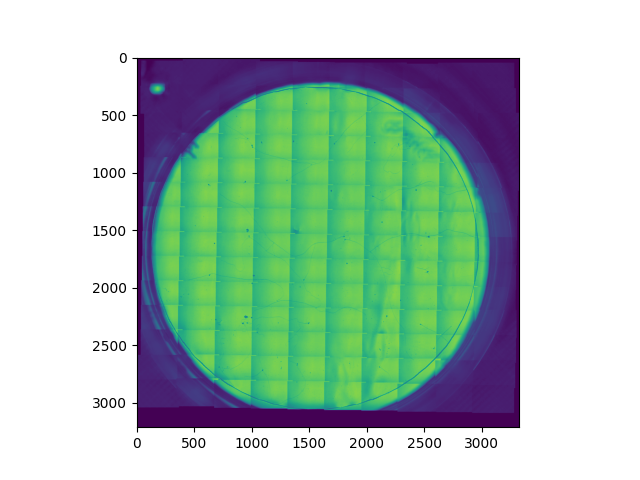

In [34]:
%matplotlib widget

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.imshow(mask_compressed)

In [25]:
[name.split("/")[-1] for name in tileconfig[0]]

['Img_r01_c01.tif',
 'Img_r01_c02.tif',
 'Img_r01_c03.tif',
 'Img_r01_c04.tif',
 'Img_r01_c05.tif',
 'Img_r01_c06.tif',
 'Img_r01_c07.tif',
 'Img_r01_c08.tif',
 'Img_r01_c09.tif',
 'Img_r02_c01.tif',
 'Img_r02_c02.tif',
 'Img_r02_c03.tif',
 'Img_r02_c04.tif',
 'Img_r02_c05.tif',
 'Img_r02_c06.tif',
 'Img_r02_c07.tif',
 'Img_r02_c08.tif',
 'Img_r02_c09.tif',
 'Img_r03_c01.tif',
 'Img_r03_c02.tif',
 'Img_r03_c03.tif',
 'Img_r03_c04.tif',
 'Img_r03_c05.tif',
 'Img_r03_c06.tif',
 'Img_r03_c07.tif',
 'Img_r03_c08.tif',
 'Img_r03_c09.tif',
 'Img_r04_c01.tif',
 'Img_r04_c02.tif',
 'Img_r04_c03.tif',
 'Img_r04_c04.tif',
 'Img_r04_c05.tif',
 'Img_r04_c06.tif',
 'Img_r04_c07.tif',
 'Img_r04_c08.tif',
 'Img_r04_c09.tif',
 'Img_r05_c01.tif',
 'Img_r05_c02.tif',
 'Img_r05_c03.tif',
 'Img_r05_c04.tif',
 'Img_r05_c05.tif',
 'Img_r05_c06.tif',
 'Img_r05_c07.tif',
 'Img_r05_c08.tif',
 'Img_r05_c09.tif',
 'Img_r06_c01.tif',
 'Img_r06_c02.tif',
 'Img_r06_c03.tif',
 'Img_r06_c04.tif',
 'Img_r06_c05.tif',


In [36]:
exp = Experiment(directory_targ)
exp.load(folders[3:])
exp.dates.sort()

/gpfs/home2/cbisot/pycode/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["date"], format="%d.%m.%Y, %H:%M:"


2022-09-26 11:26:00
2022-09-30 19:25:00
2022-10-03 18:29:00


In [13]:
for t in range(exp.ts):
    exp.load_tile_information(t)

In [37]:
for t in range(exp.ts):
    exp.load_tile_information(t)

load_graphs(exp, directory_targ, post_process=False)

In [13]:
exp.dimX_dimY

(3648, 5472)

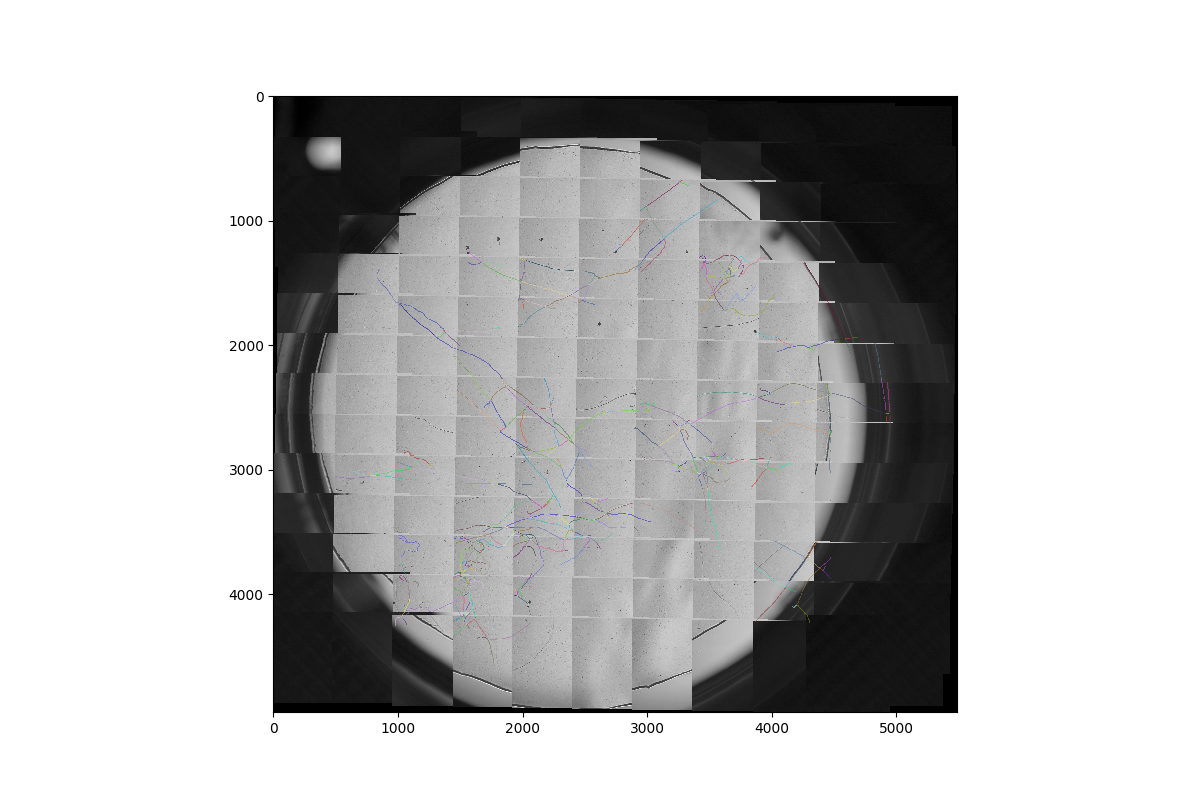

In [15]:
%matplotlib widget
t = 2
plot_full_image_with_features(exp, t, edges=get_all_edges(exp, t), dilation=5)

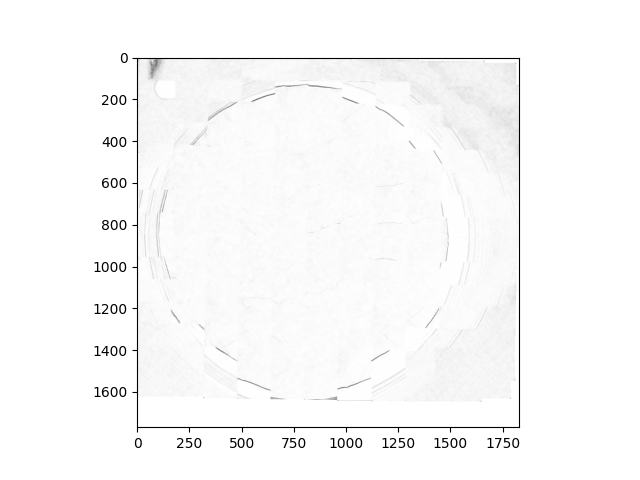

In [24]:
fig, ax = plt.subplots()
ax.imshow(-ims[1], cmap="gray")

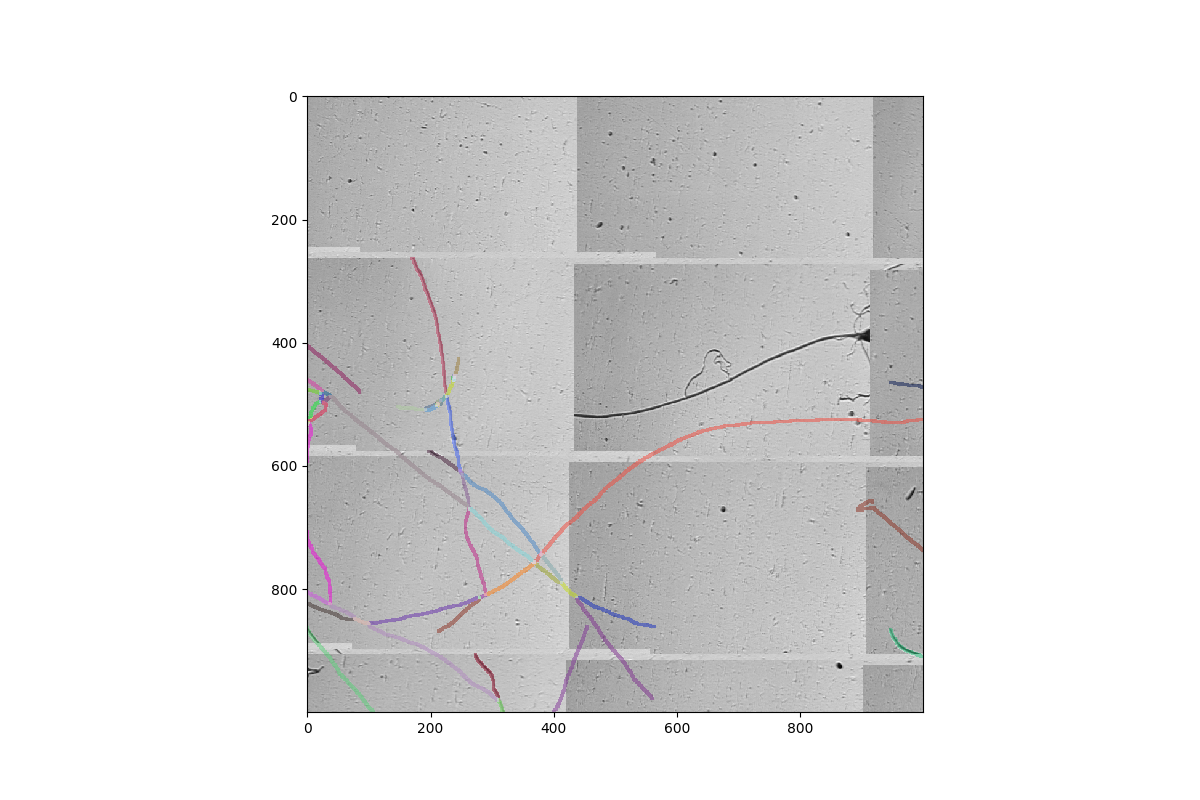

In [38]:
plot_full_image_with_features(
    exp,
    t,
    edges=get_all_edges(exp, t),
    dilation=5,
    region=[[10000, 10000], [15000, 15000]],
)

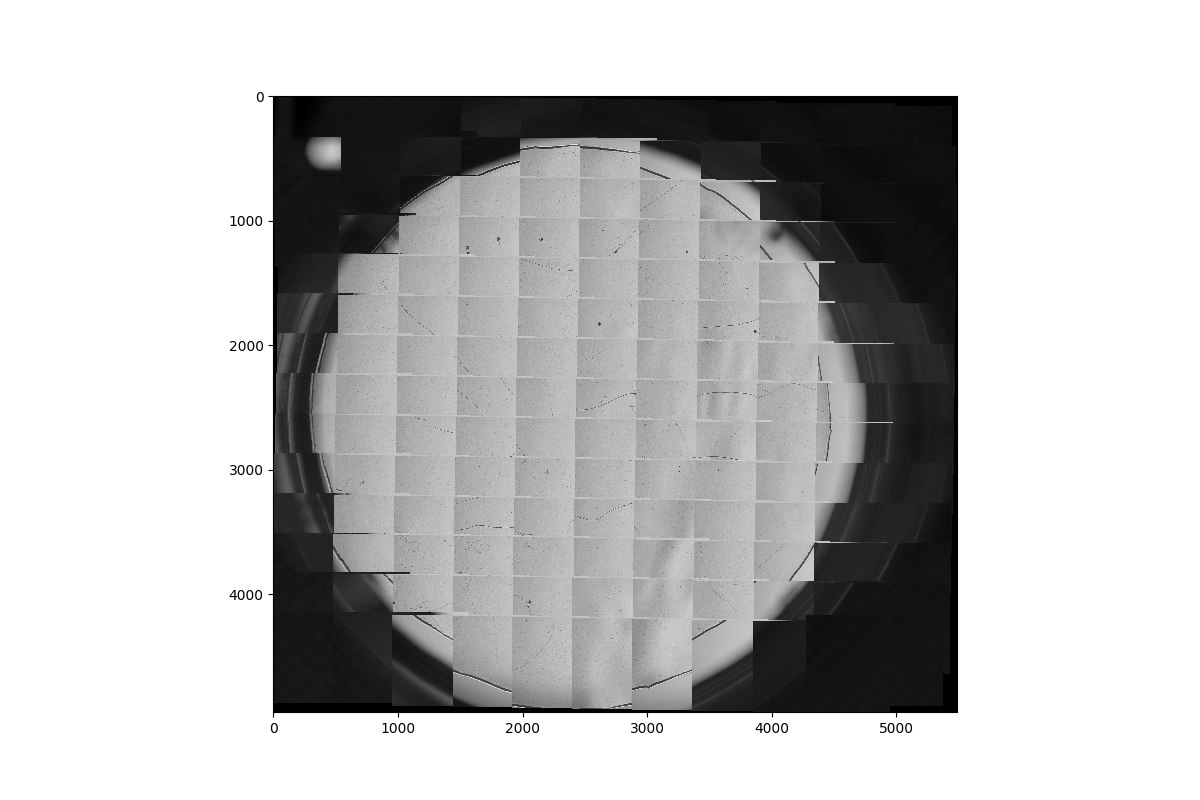

In [13]:
plot_full_image_with_features(exp, t)

In [ ]:
plt.close("all")
start = 0
finish = start + 2
for i in range(start, finish):
    plot_t_tp1([], [], None, None, skels[i], skels[i])

In [17]:
%matplotlib widget

import os
import sys

sys.path.insert(0, os.getenv("HOME") + "/pycode/MscThesis/")
# sys.path.insert(0,r'C:\Users\coren\Documents\PhD\Code\AMFtrack')

import pandas as pd
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    get_current_folders,
    get_folders_by_plate_id,
)


import ast
from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from amftrack.pipeline.functions.image_processing.extract_graph import (
    from_sparse_to_graph,
    generate_nx_graph,
    sparse_to_doc,
)
from skimage.feature import hessian_matrix_det
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
)

In [20]:
folder_list

['20220920_1438_Plate01',
 '20220921_1716_Plate01',
 '20220923_1447_Plate01',
 '20220926_1126_Plate01',
 '20220930_1925_Plate01',
 '20221003_1829_Plate01']

In [21]:
directory = directory_targ
select = folders
folder_list = list(select["folder"])
folder_list.sort()
skels = []
ims = []
masks = []
kernel = np.ones((5, 5), np.uint8)
itera = 5
start = 4
finish = start + 2
kernel = np.ones((5, 5), np.uint8)
for folder in folder_list[start:finish]:
    path_snap = directory + folder
    skel_info = read_mat(path_snap + "/Analysis/skeleton_pruned_compressed.mat")
    skel = skel_info["skeleton"]
    skels.append(cv2.dilate(skel.astype(np.uint8), kernel, iterations=itera))
    im = read_mat(path_snap + "/Analysis/raw_image.mat")["raw"]
    ims.append(im)

In [21]:
folder_list[4]

'20220930_1925_Plate01'

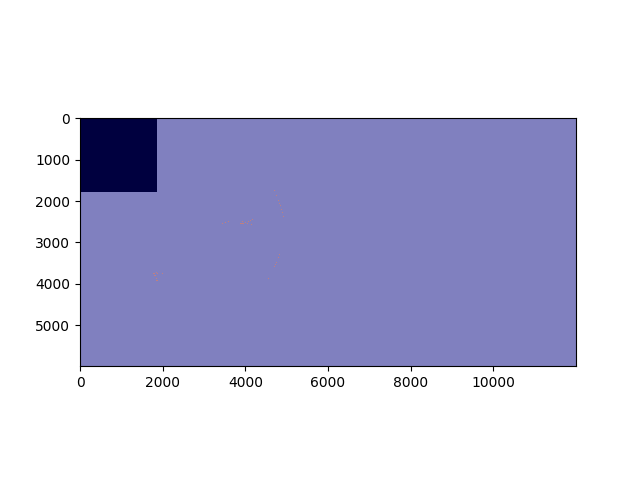

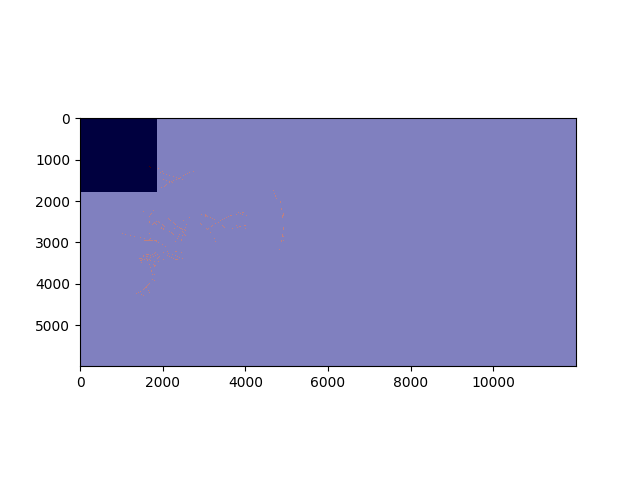

In [75]:
plt.close("all")
kernel = np.ones((5, 5), np.uint8)
for i in range(len(skels)):
    plot_t_tp1([], [], None, None, skels[i], 0 * ims[i])

In [142]:
folder_list = list(folders["folder"])
folder_list.sort()

dilateds = []
skel_docs = []
directory_name = folder_list[0]
path_snap = directory + directory_name
skel_info = read_mat(path_snap + "/Analysis/skeleton_pruned.mat")
skel = skel_info["skeleton"]
skel_doc = sparse_to_doc(skel)
skel_docs.append(skel_doc)
Rs = [np.array([[1, 0], [0, 1]])]
ts = [np.array([0, 0])]
for i, directory_name in enumerate(folder_list[1:]):
    path_snap = directory + directory_name
    skel_info = read_mat(path_snap + "/Analysis/skeleton_pruned_realigned.mat")
    skel = skel_info["skeleton"]
    skel_doc = sparse_to_doc(skel)
    skel_docs.append(skel_doc)
    try:
        transform = sio.loadmat(path_snap + "/Analysis/transform.mat")
    except:
        transform = sio.loadmat(path_snap + "/Analysis/transform_corrupt.mat")
    R, t = transform["R"], transform["t"]
    Rs.append(R)
    ts.append(t)

In [143]:
skel

<30000x60000 sparse matrix of type '<class 'numpy.uint8'>'
	with 307355 stored elements in Compressed Sparse Column format>

In [88]:
skel_sparse = skel
dim = skel_sparse.shape

compressed = cv2.resize(
    cv2.dilate(skel_sparse.todense(), kernel, iterations=itera),
    (dim[1] // 5, dim[0] // 5),
)

In [95]:
from amftrack.pipeline.functions.image_processing.realign import (
    transform_skeleton_final,
)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [96]:
R0 = np.array([[1, 0], [0, 1]])
t0 = np.array([0, 0])
j = 3
for i, skel in enumerate(skel_docs):
    R0 = np.dot(np.transpose(Rs[i]), R0)
    t0 = -np.dot(ts[i], np.transpose(Rs[i])) + np.dot(t0, np.transpose(Rs[i]))
    directory_name = folder_list[i]
    path_snap = directory + directory_name
    if i == j:
        print(f"saving {i} {path_snap}")
        skel_aligned = transform_skeleton_final(skel, R0, t0).astype(np.uint8)
        skel_sparse_2 = scipy.sparse.csc_matrix(skel_aligned)
        dim = skel_sparse.shape
        kernel = np.ones((5, 5), np.uint8)
        itera = 1
        compressed = cv2.resize(
            cv2.dilate(skel_sparse.todense(), kernel, iterations=itera),
            (dim[1] // 5, dim[0] // 5),
        )

saving 3 /projects/0/einf914/data/20220926_1126_Plate01


In [101]:
Rot, trans = R0, t0
skeleton_doc = skel_doc
skeleton_transformed = {}
transformed_keys = np.round(
    np.transpose(np.dot(Rot, np.transpose(np.array(list(skeleton_doc.keys()))))) + trans
).astype(np.int)

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [102]:
faulty = []
for pixel in list(transformed_keys):
    if pixel[0] >= 0 and pixel[1] >= 0:
        skeleton_transformed[(pixel[0], pixel[1])] = 1
    else:
        faulty.append(pixel)

In [107]:
xs = [pos[0] for pos in list(transformed_keys)]
ys = [pos[1] for pos in list(transformed_keys)]

In [114]:
print(len(skeleton_transformed.keys()))
skeleton_transformed2 = dilate(skeleton_transformed)
print(len(skeleton_transformed2.keys()))
skeleton_transformed3 = zhangSuen(skeleton_transformed2)
print(len(skeleton_transformed3.keys()))

308415
1081664
307355


In [133]:
skeleton_transformed_sparse = sparse.lil_matrix((30000, 60000)).astype(np.uint8)
for pixel in list(skeleton_transformed.keys()):
    # if pixel[0]<30000 and pixel[1]<60000:
    skeleton_transformed_sparse[(pixel[0], pixel[1])] = 1

In [134]:
skel_sparse = scipy.sparse.csc_matrix(skeleton_transformed_sparse, shape=(30000, 60000))

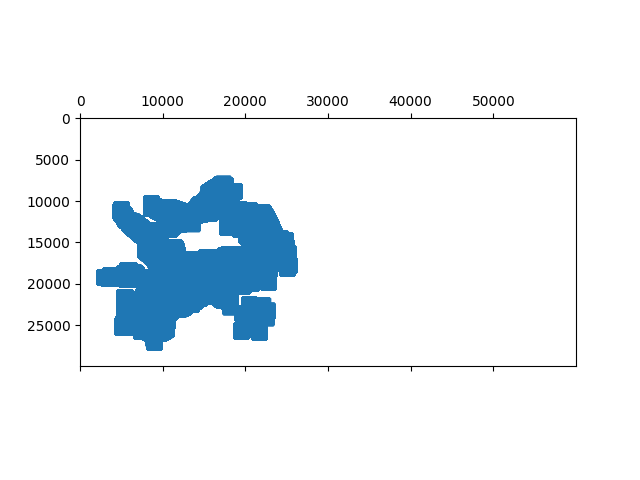

In [135]:
fig, ax = plt.subplots()
ax.spy(skeleton_transformed_sparse)

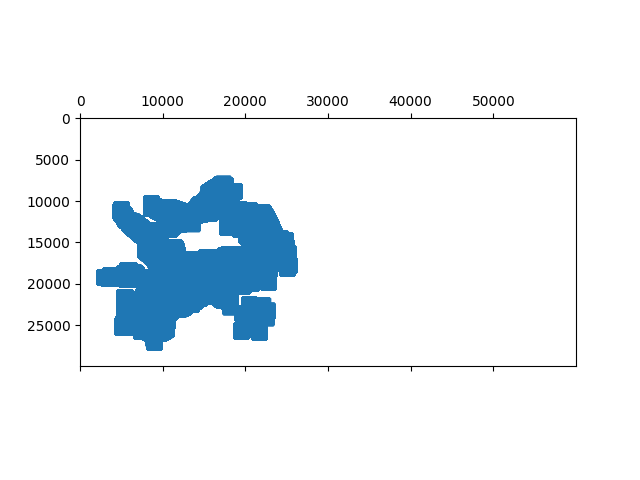

In [136]:
fig, ax = plt.subplots()
ax.spy(skel_sparse)

In [137]:
print(np.sum(skel_sparse))
print(np.sum(skeleton_transformed_sparse))

308415
308415


In [98]:
skeleton_transformed = {}
transformed_keys = np.round(
    np.transpose(np.dot(Rot, np.transpose(np.array(list(skeleton_doc.keys()))))) + trans
).astype(np.int)
for pixel in list(transformed_keys):
    if pixel[0] >= 0 and pixel[1] >= 0:
        skeleton_transformed[(pixel[0], pixel[1])] = 1
    else:
        # print("some negative pixels")
        pass
skeleton_transformed = dilate(skeleton_transformed)
skeleton_transformed = zhangSuen(skeleton_transformed)
skeleton_transformed_sparse = sparse.lil_matrix((30000, 60000)).astype(np.uint8)
for pixel in list(skeleton_transformed.keys()):
    # if pixel[0]<30000 and pixel[1]<60000:
    skeleton_transformed_sparse[(pixel[0], pixel[1])] = 1

(array([[ 0.99912832,  0.0417445 ],
        [-0.0417445 ,  0.99912832]]),
 array([[3798.09994568, 1033.43393825]]))

In [92]:
np.sum(skel_sparse)

308626

In [97]:
np.sum(skel_sparse_2)

120357

In [90]:
skel = read_mat(path_snap + "/Analysis/skeleton_masked.mat")["skeleton"]
skeleton = scipy.sparse.dok_matrix(skel)

In [91]:
skeleton.shape

(26553, 27424)

In [164]:
# select = all_folders.loc[(all_folders['folder'].isin([ '20210929_0308_Plate21',
#  '20210929_0912_Plate21']))]
select = folders
folder_list = list(select["folder"])
folder_list.sort()
skels = []
ims = []
kernel = np.ones((5, 5), np.uint8)
itera = 5
start = 2

# start = choice(range(len(folder_list)))
finish = start + 2
for folder in folder_list[start:finish]:
    path_snap = directory + folder
    skel_info = read_mat(path_snap + "/Analysis/skeleton_pruned_compressed.mat")
    skel = skel_info["skeleton"]
    skels.append(cv2.dilate(skel.astype(np.uint8), kernel, iterations=itera))
    im = read_mat(path_snap + "/Analysis/raw_image.mat")["raw"]
    #     im = imageio.imread(path_snap+'/StitchedImage.tif')
    #     im = cv2.resize(im,(skel.shape[1],skel.shape[0]))
    #     M = np.float32([
    # 	[1, 0, 0],
    # 	[0, 1, -117]])
    #     im = cv2.warpAffine(im,M,(im.shape[1], im.shape[0]))
    ims.append(im)